In [1]:
## FIRST WRF PYTHON EXAMPLE

import numpy as np
import xarray as xr
import xwrf

import inspect

from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib import cm

import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

FullArgSpec(args=['wrfin', 'varname', 'timeidx', 'method', 'squeeze', 'cache', 'meta'], varargs=None, varkw='kwargs', defaults=(0, 'cat', True, None, True), kwonlyargs=[], kwonlydefaults=None, annotations={})
<xarray.DataArray 'PREC_ACC_NC' (south_north: 2027, west_east: 1471)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05591821, 0.05462814,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05438748, 0.05284047,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -98.47 -98.42 ... -34.86 -34.83
    XLAT     (south_north, west_east) 

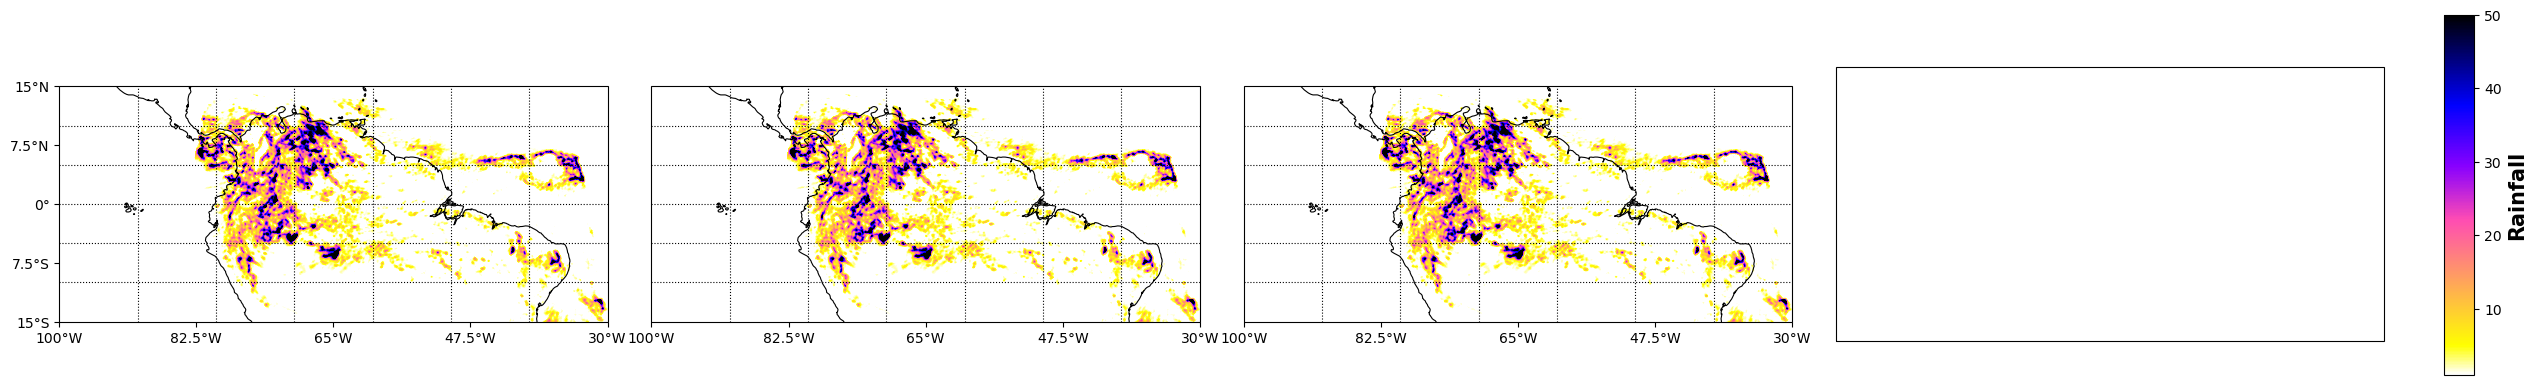

In [3]:
# Global stuff
lon_min = -100. ; lon_max = -30
lat_min = -15. ; lat_max = 15.

print(inspect.getfullargspec(getvar))

# Open the NetCDF file

#ncfile = Dataset('/glade/scratch/rneale/SAAG/201506_PREC_ACC_NC_SouthAmerica.nc')
ncfile = Dataset('/glade/scratch/rneale/SAAG/tmp/wrf2d_d01_daily_tot_201006.nc')
#dset = xr.open_dataset(ncfile,engine='xwrf')



#print(ncfile)

# Get the sea level pressure
prect = getvar(ncfile, "PREC_ACC_NC")

print(prect)


# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_prect = smooth2d(prect, 30, cenweight=4)
#print(smooth_slp)

# Get the latitude and longitude points
lats, lons = latlon_coords(prect)

# Get the cartopy mapping object
#cart_proj = get_cartopy(slp)




# Create a figure
#fig = plt.figure(figsize=(24,12))
crs = ccrs.PlateCarree()


fig,ax = plt.subplots(ncols=3,figsize=[30, 18],subplot_kw={'projection': ccrs.PlateCarree()})
    
#ax = fig.add_subplot(1,3, 1,facecolor='None', projection=crs)

# Set the GeoAxes to the projection used by WRF
#ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
#states = NaturalEarthFeature(category="cultural", scale="50m",
#                             facecolor="none",
#                             name="admin_1_states_provinces_shp")
#ax.add_feature(states, linewidth=.5, edgecolor="black")


# Make the contour outlines and filled contours for the smoothed sea level
# pressure.

levels = [1 + 2*n for n in range(15)]

#norm = cm.colors.Normalize(vmax=abs(smooth_slp).max(), vmin=-0.)
#cmap = cm.PRGn


#extent = [to_np(lons.min),to_np(lons.max),to_np(lats.min),to_np(lats.max)]
#extent = [-120,-40,-20,10]


#print(lons.min)
#im = ax.imshow(to_np(smooth_slp), interpolation='nearest',
#                   cmap='gnuplot2_r',norm=norm,extent=extent)


#ax.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="k",
#            transform=crs.PlateCarree(),levels=levels)


#plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10, levels=levels,



#plt.contourf(lons, lats, smooth_slp, 10, levels=levels,
#             transform=crs.PlateCarree(),
#             cmap="gnuplot2_r",rasterized=True)

for ii in range(0,3): 
    plotx = ax[ii].pcolormesh(lons, lats, smooth_prect, cmap="gnuplot2_r",vmin=1.,vmax=50.)
    ax[ii].coastlines('50m', linewidth=0.8)
    
   

# Add a color bar
#mp.colorbar(im,ax=ax, shrink=.98)

# Set the map bounds
#ax.set_xlim()
#ax.set_ylim(cartopy_ylim(smooth_slp))

    ax[ii].set_xlim((lon_min,lon_max))
    ax[ii].set_ylim((lat_min,lat_max))

# Add the gridlines

    ax[ii].gridlines(color="black", linestyle="dotted")

    ax[ii].set_xticks(np.linspace(lon_min, lon_max, 5), crs=crs)  
    lon_formatter = LongitudeFormatter()
    ax[ii].xaxis.set_major_formatter(lon_formatter)
    
    
ax[0].set_yticks(np.linspace(lat_min, lat_max, 5), crs=crs)  
lat_formatter = LatitudeFormatter()
ax[0].yaxis.set_major_formatter(lat_formatter)
    
cb_ax = fig.add_axes([0.92, 0.4, 0.01, 0.2]) # xmin,ymin,dx,dy (Location of Colorbar)
plt.colorbar(plotx, cax=cb_ax,orientation="vertical").set_label(label='Rainfall',size=15,weight='bold')

plt.subplots_adjust(wspace=0.08, hspace=0.05)

#plt.tight_layout()
#plt.title("Sea Level Pressure (hPa)")

plt.show()

fig_dir = ""
fig.savefig('pywrf_test.png', dpi=300, bbox_inches='tight') 